In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np

import cv2

from google.colab.patches import cv2_imshow

path = '/content/drive/MyDrive/OpenCV-Images/image filter.JPG'

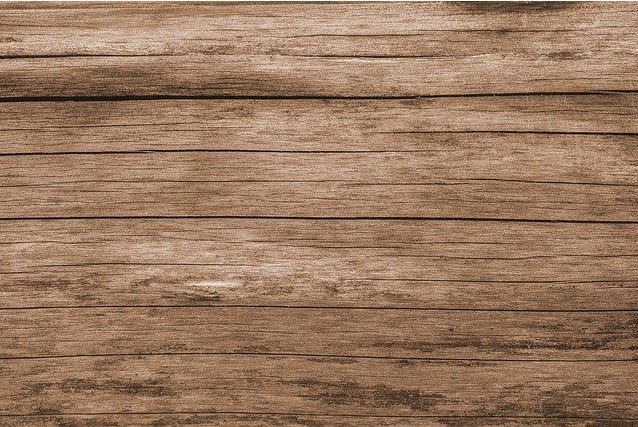

In [7]:
from google.colab.patches import cv2_imshow

img = cv2.imread(path, cv2.IMREAD_COLOR)
cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

- The following steps are performed in the code below:

 - Read the test image

 - Define the identity kernel, using a 3×3 NumPy array

 - Use the filter2D() function in OpenCV to perform the linear filtering operation

 - Display the original and filtered images, using imshow()

 - Save the filtered image to disk, using imwrite()

**Syntax**

filter2D(src, ddepth, kernel)

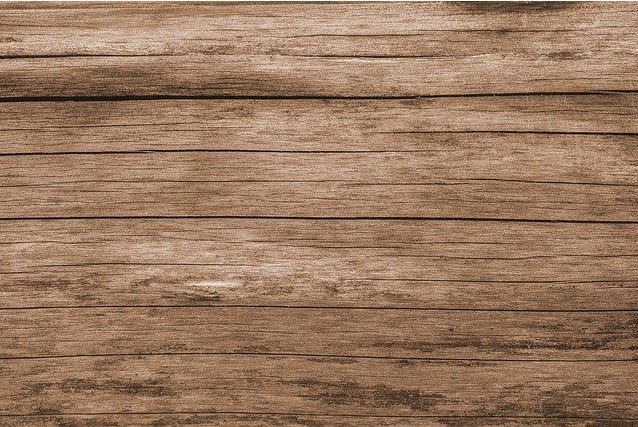

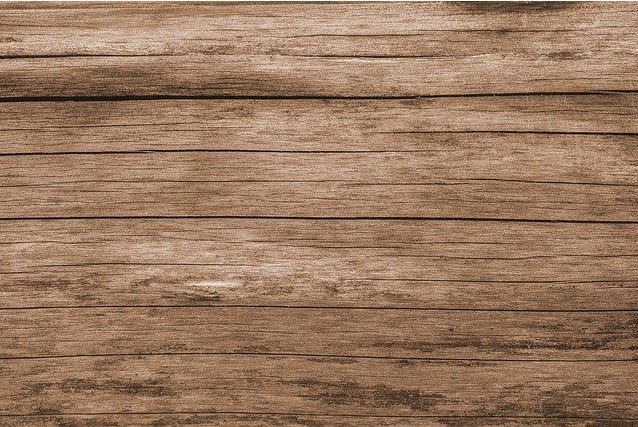

In [9]:
"""
3
Apply identity kernel
4
"""
kernel1 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])

# filter2D() function can be used to apply kernel to an image.

# Where ddepth is the desired depth of final image. ddepth is -1 if...

# ... depth is same as original or source image.
identity = cv2.filter2D(src=img, ddepth=-1, kernel=kernel1)

# We should get the same image
cv2_imshow(img)    # Original
cv2_imshow(identity) # Identity

cv2.waitKey()
cv2.imwrite('identity.jpg', identity)
cv2.destroyAllWindows()

- As you can see in the below image, the filtered image (on the right) appears identical to the original image (on the left)

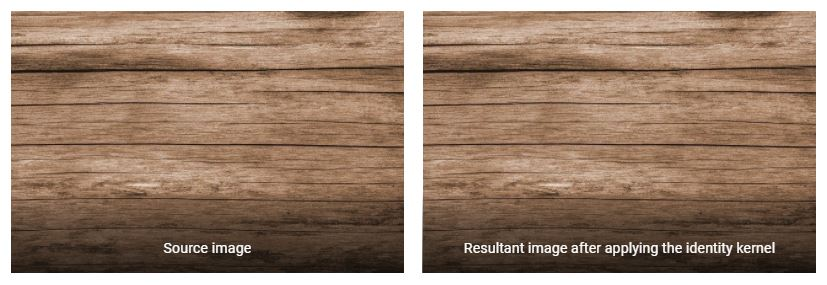

#### **1) Blurring an Image using a Custom 2D-Convolution Kernel**

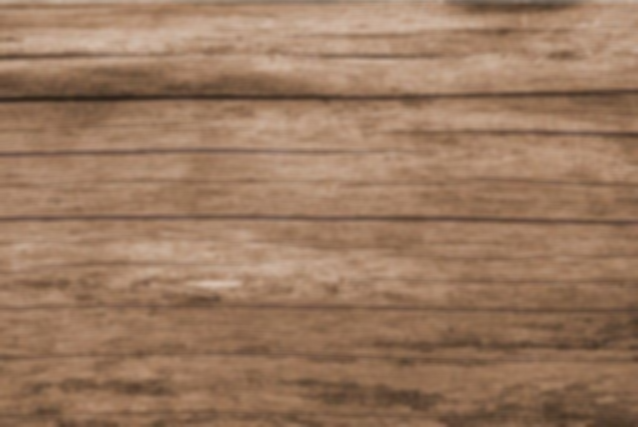

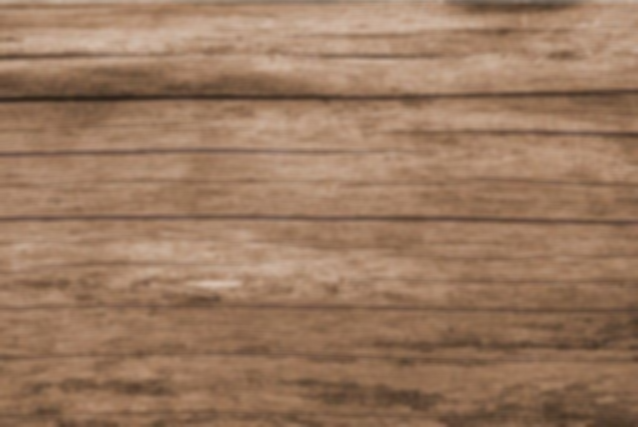

In [11]:
"""
Apply blurring kernel
"""
kernel2 = np.ones((5, 5), np.float32) / 25
img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel2)

cv2_imshow(img) # Original
cv2_imshow(img) # Kernel Blur

cv2.waitKey()
cv2.imwrite('blur_kernel.jpg', img)
cv2.destroyAllWindows()

- Look at the results in image given below and note how the filtered image (on the right) has been blurred compared to the original image (on  the left).

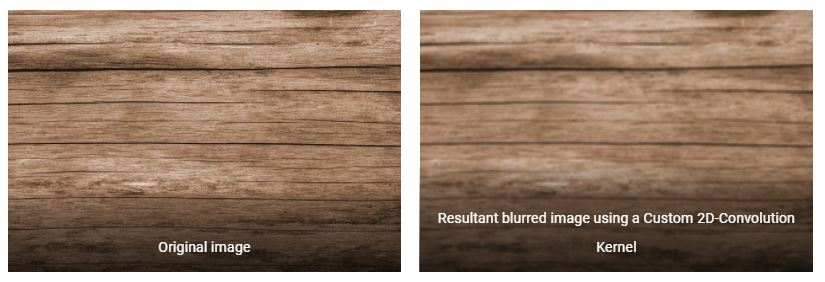

#### **2) Blurring an Image Using Built-In Function**

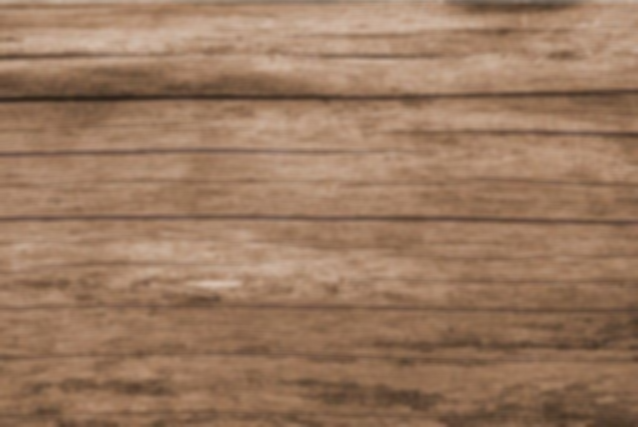

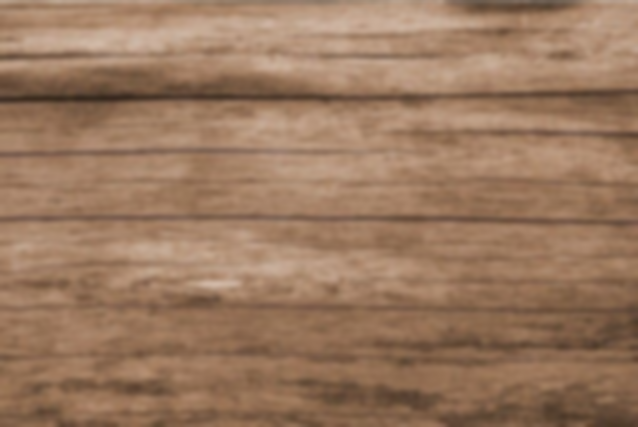

In [14]:
"""
Apply blur using `blur()` function
"""
img_blur = cv2.blur(src=img, ksize=(5,5)) # Using the blur function to blur an image where ksize is the kernel size

# Display using cv2.imshow()
cv2_imshow(img) # Original
cv2_imshow(img_blur) # Blurred

cv2.waitKey()
cv2.imwrite('blur.jpg', img_blur)
cv2.destroyAllWindows()

#### **3) Gaussian Blurring**

GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])

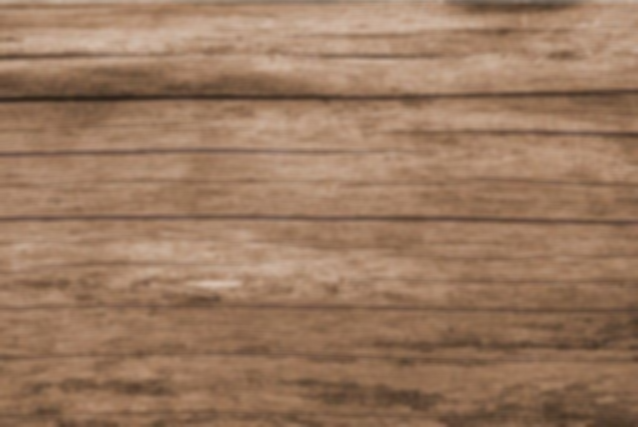

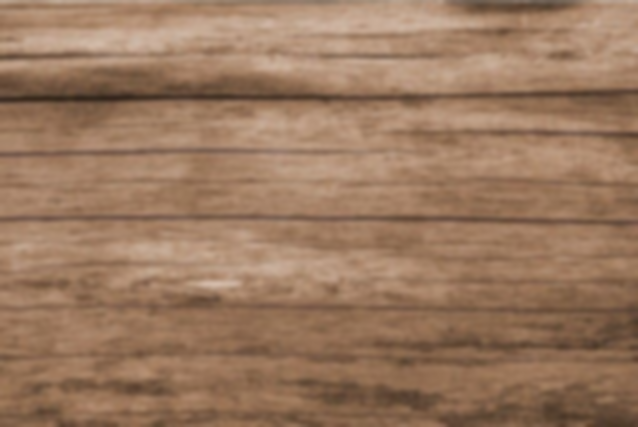

In [15]:
"""
Apply Gaussian blur
"""
# sigmaX is Gaussian Kernel standard deviation
# ksize is kernel size
gaussian_blur = cv2.GaussianBlur(src=img, ksize=(5,5), sigmaX=0, sigmaY=0)

cv2_imshow(img)         # Original
cv2_imshow(gaussian_blur) # Gaussian Blurred

cv2.waitKey()
cv2.imwrite('gaussian_blur.jpg', gaussian_blur)
cv2.destroyAllWindows()

- The result is shown in figure given below. As you can see, there is a slight amount of blurring in the filtered image on the right

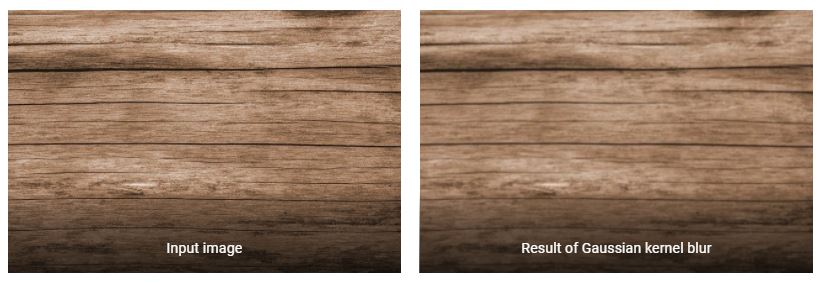

#### **4) Median Blurring**

medianBlur(src, ksize)

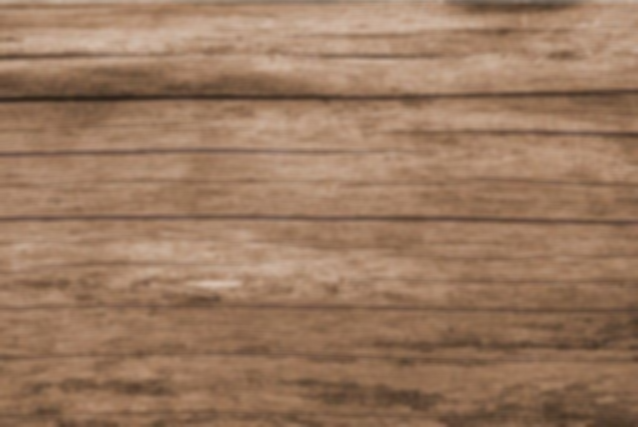

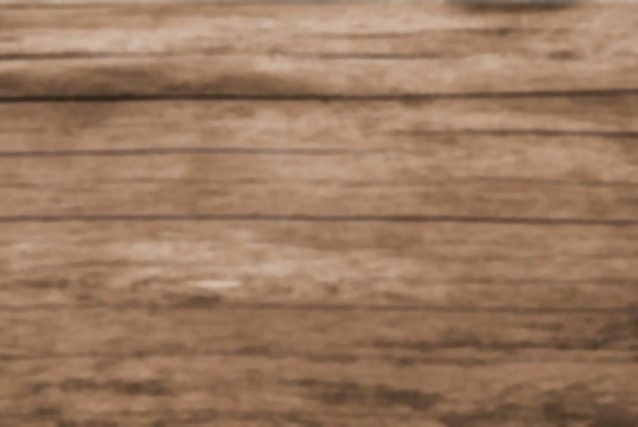

In [16]:
"""
Apply Median blur
"""
# medianBlur() is used to apply Median blur to image
# ksize is the kernel size
median = cv2.medianBlur(src=img, ksize=5)

cv2_imshow(img)  # Original
cv2_imshow(median) # Median Blurred

cv2.waitKey()
cv2.imwrite('median_blur.jpg', median)
cv2.destroyAllWindows()

- See the results of median blurring in figure given below. Note how for the same kernel size, the effect of median blurring is more prominent than Gaussian blurring. Median burring is often used to reduce ‘salt and pepper’ noise in images, as shown here.

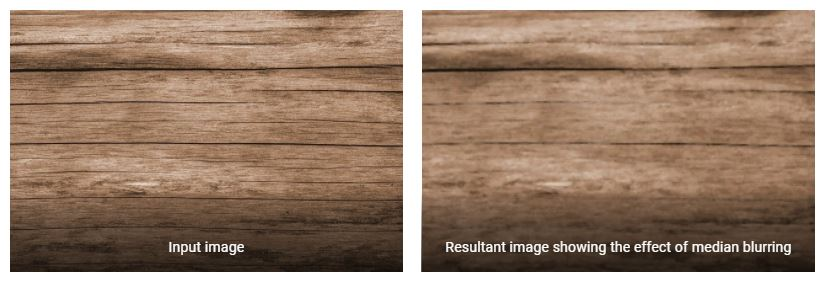

#### **5) Sharpening an Image Using Custom 2D-Convolution Kernels**

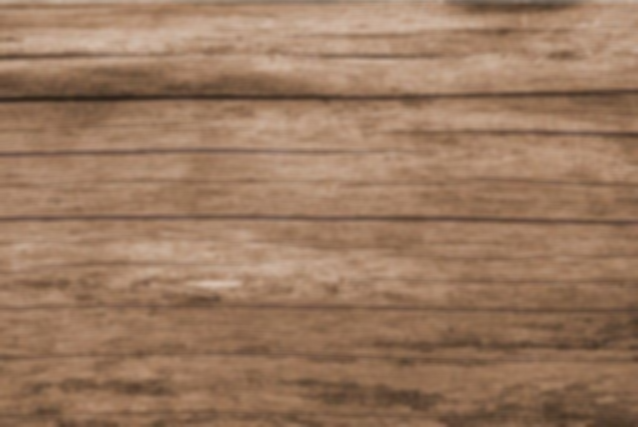

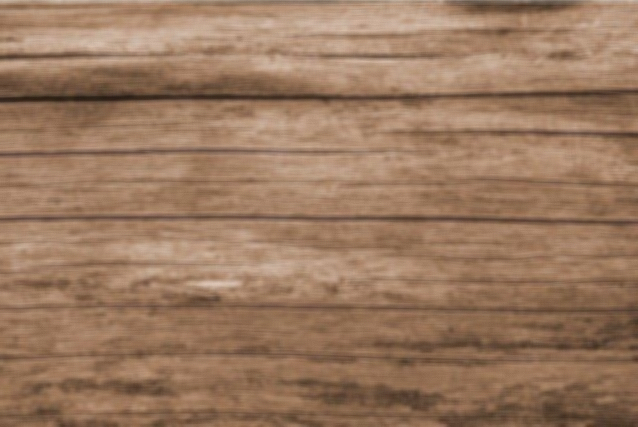

In [17]:
"""
Apply sharpening using kernel
"""
kernel3 = np.array([[0, -1,  0],
                   [-1,  5, -1],
                   [0, -1,  0]])

sharp_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel3)

cv2_imshow(img)       # Original
cv2_imshow(sharp_img) # Sharpened

cv2.waitKey()
cv2.imwrite('sharp_image.jpg', sharp_img)
cv2.destroyAllWindows()

- So, what kind of results do we get? Have a look at figure given below. The sharpening effects are very impressive. The sharpened image on the right reveals cracks in the wood that were not visible before.

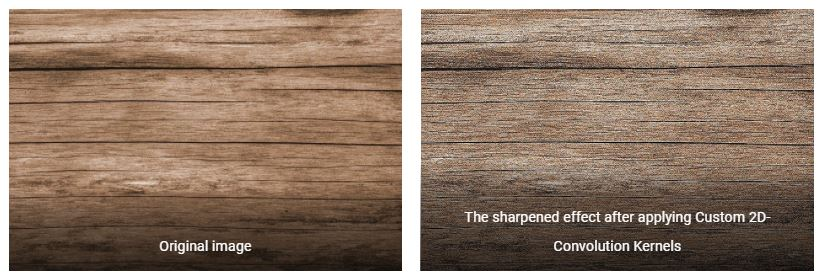

#### **6) Bilateral Filtering to an Image**

bilateralFilter(src, d, sigmaColor, sigmaSpace)

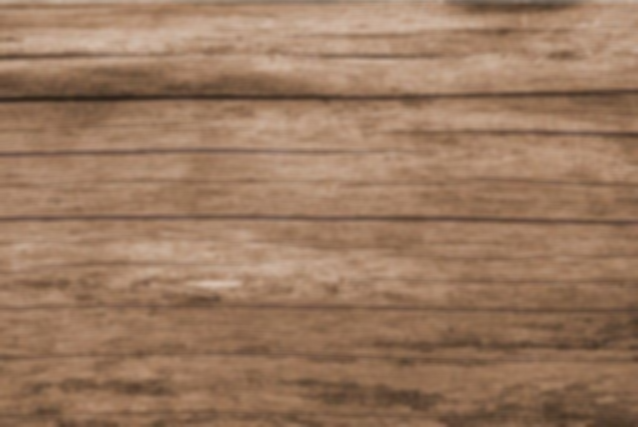

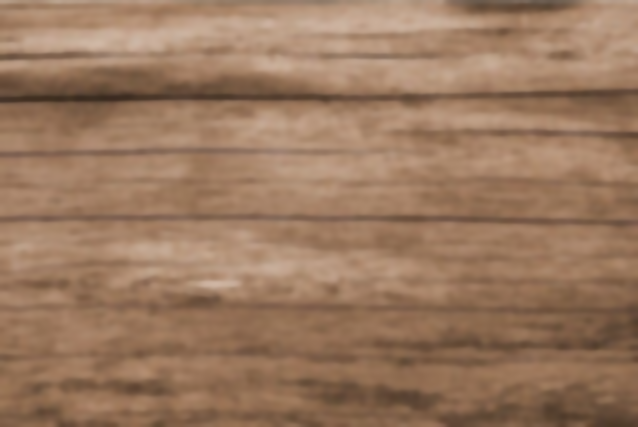

In [18]:
"""
Apply Bilateral Filtering
"""
# Using the function bilateralFilter() where d is diameter of each...
# ...pixel neighborhood that is used during filtering.
# sigmaColor is used to filter sigma in the color space.
# sigmaSpace is used to filter sigma in the coordinate space.
bilateral_filter = cv2.bilateralFilter(src=img, d=9, sigmaColor=75, sigmaSpace=75)

cv2_imshow(img)              # Original
cv2_imshow(bilateral_filter) # Bilateral Filtering

cv2.waitKey(0)
cv2.imwrite('bilateral_filtering.jpg', bilateral_filter)
cv2.destroyAllWindows()

- Check out the results of bilateral filtering in figure given below. See how regions of more uniform pixel intensity have been smoothed (blurred), while preserving the fine cracks (edges) in the wood. Bilateral filtering is a very effective technique, but can prove computationally  expensive (especially for large kernel sizes). So choose wisely, depending on your particular application

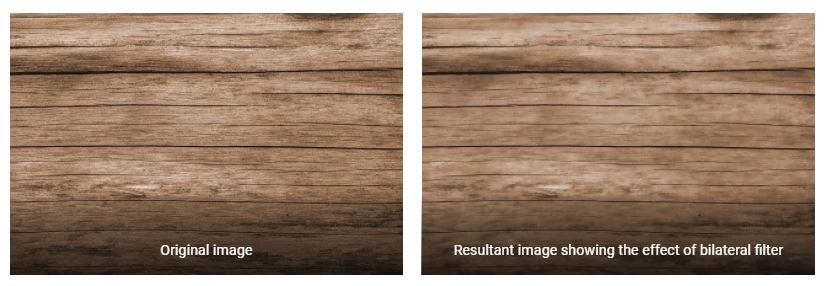

#### **Reference**

- https://learnopencv.com/image-filtering-using-convolution-in-opencv/